<a href="https://colab.research.google.com/github/LaioGomes/Regressao-Linear/blob/main/Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
baseDados = pd.read_excel('BaseDados_RegressaoLinear.xlsx')
baseDados.head()

,Salario,Limite Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [5]:
baseDados.columns

Index(['Salario', 'Limite Emprestimo'], dtype='object')

In [6]:
baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            150 non-null    float64
 1   Limite Emprestimo  150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [7]:
baseDados.describe()

,Salario,Limite Emprestimo
count,150.000000,150.000000
mean,2100.530253,4853.023496
std,656.636604,1503.079403
min,1250.219130,2900.124323
25%,1499.185073,3434.630087
50%,1908.314282,4426.702913
75%,2743.940367,6365.098731
max,3400.837850,7500.234234


In [8]:
eixoX = baseDados.iloc[:,0].values
eixoY = baseDados.iloc[:,1].values

In [9]:
eixoX

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

In [10]:
eixoY

array([2900.124323  , 2929.12556623, 2958.41682189, 2988.00099011,
       3017.88100001, 3031.05981001, 3078.54040811, 3109.32581219,
       3140.41907032, 3171.82326102, 3203.54149363, 3235.57690857,
       3267.93267765, 3300.61200443, 3333.61812447, 3366.95430572,
       3400.62384877, 3434.63008726, 3434.63008726, 3434.63008726,
       3434.63008726, 3574.08984167, 3609.83074009, 3645.92904749,
       3682.38833796, 3719.21222134, 3756.40434356, 3793.96838699,
       3831.90807086, 3870.22715157, 3870.22715157, 3870.22715157,
       3870.22715157, 4027.37389354, 4067.64763247, 4108.3241088 ,
       4149.40734988, 4190.90142338, 4232.81043762, 4275.13854199,
       4317.88992741, 4361.06882669, 4404.67951495, 4448.7263101 ,
       4493.2135732 , 4538.14570894, 4583.52716602, 4629.36243768,
       4675.65606206, 4722.41262268, 4769.63674891, 4817.3331164 ,
       4865.50644756, 4914.16151204, 4963.30312716, 5012.93615843,
       5063.06552001, 5113.69617521, 5164.83313697, 5216.48146

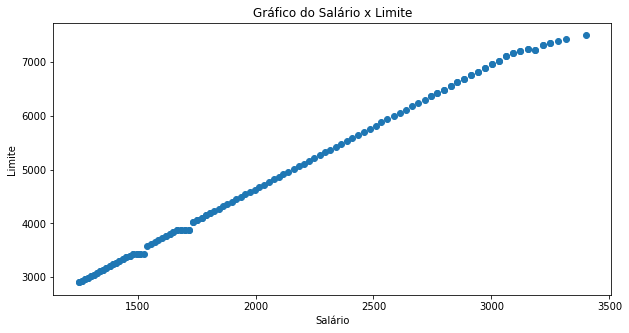

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(eixoX, eixoY)
plt.title('Gráfico do Salário x Limite')
plt.xlabel('Salário')
plt.ylabel('Limite');

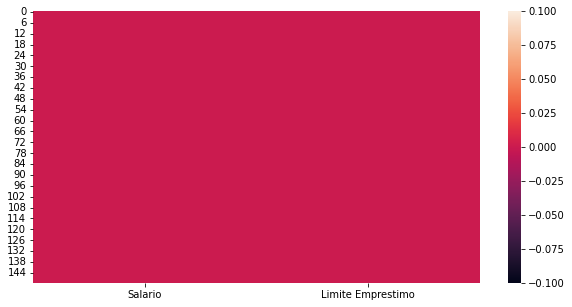

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(baseDados.isnull());

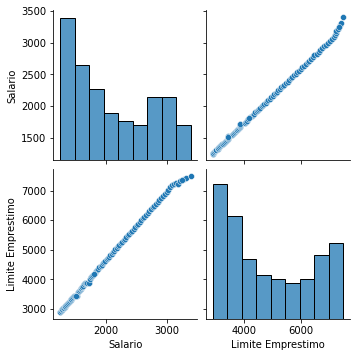

In [13]:
sns.pairplot(baseDados);

In [14]:
correlacao = np.corrcoef( eixoX, eixoY)
correlacao

array([[1.        , 0.99940698],
       [0.99940698, 1.        ]])

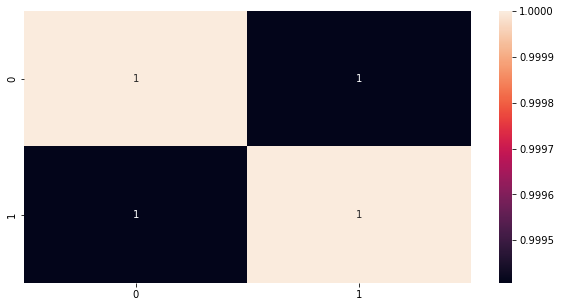

In [15]:
plt.figure( figsize=(10,5) )
sns.heatmap(correlacao, annot=True);

In [16]:
eixoX = eixoX.reshape(-1, 1)
eixoY = eixoY.reshape(-1, 1)

In [17]:
from sklearn.model_selection import train_test_split
    
xTreinamento, xTeste, yTreinamento, yTeste = train_test_split(
        eixoX,
        eixoY,
        test_size=0.2
)

In [18]:
print( len( xTreinamento ), len( xTeste ))

120 30


In [19]:
from sklearn.linear_model import LinearRegression

funcaoRegressao = LinearRegression()

funcaoRegressao.fit(xTreinamento, yTreinamento)

LinearRegression()

In [20]:
funcaoRegressao.score( xTreinamento, yTreinamento)

0.9986857955656799

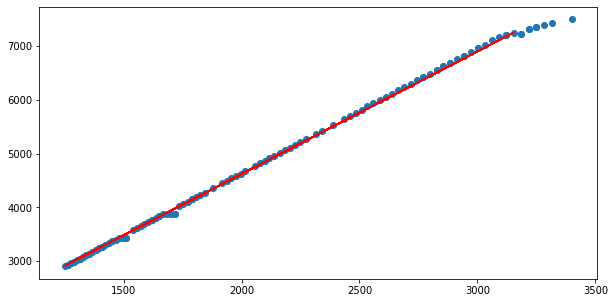

In [21]:
plt.figure( figsize=(10,  5) )
plt.scatter(xTreinamento, yTreinamento)
plt.plot( xTeste, funcaoRegressao.predict(xTeste), color='red');

In [22]:
previsoes = funcaoRegressao.predict(xTeste)

from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(yTeste, previsoes)))

RMSE 37.7443597971073


In [23]:
print( funcaoRegressao.predict([[1200]]))

[[2797.27378788]]
